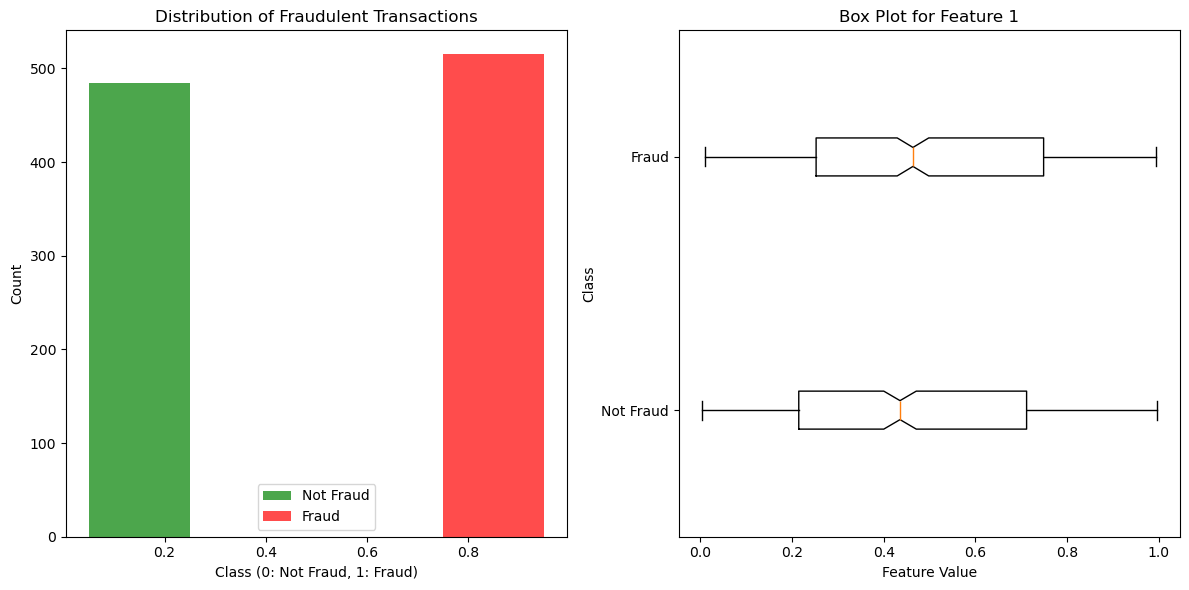

Accuracy: 0.495
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.42      0.45       100
           1       0.50      0.57      0.53       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

Confusion Matrix:
 [[42 58]
 [43 57]]


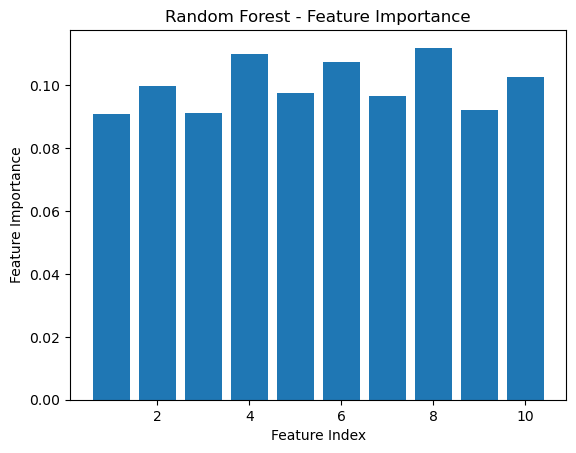


Best Hyperparameters:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

Tuned Model Metrics:
Accuracy: 0.505
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.42      0.46       100
           1       0.50      0.59      0.54       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

Confusion Matrix:
 [[42 58]
 [41 59]]


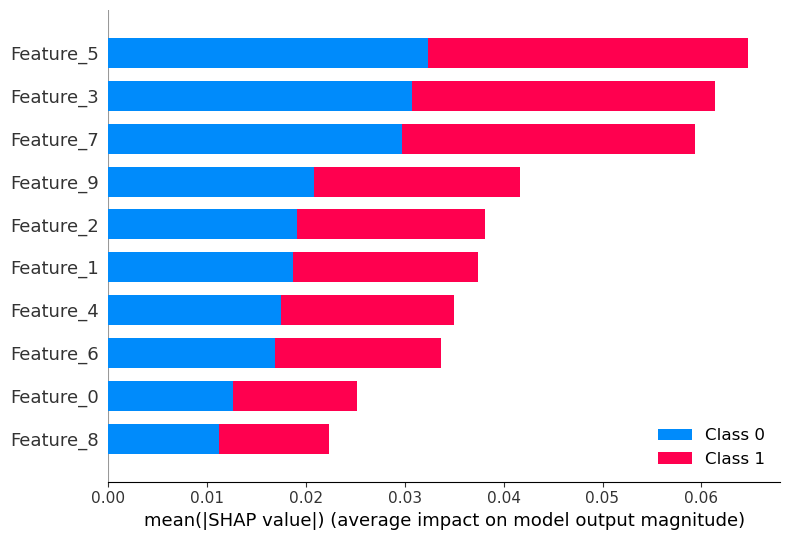


Conclusion:
The Random Forest model has been trained, evaluated, and interpreted.
Key findings include the importance of certain features in predicting fraud.
Further analysis and optimization may be needed for real-world application.


In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import shap

# Step 1: Generate Synthetic Dataset
np.random.seed(42)

# Generate synthetic data with 1000 samples, 10 features
X = np.random.rand(1000, 10)
y = np.random.choice([0, 1], size=1000)

# Step 2: Data Exploration
# Visualize data distribution, check for missing values or outliers
# (Add your data exploration code here, e.g., histograms, box plots, etc.)
plt.figure(figsize=(12, 6))

# Example: Visualizing the distribution of the target variable
plt.subplot(1, 2, 1)
plt.hist([y[y == 0], y[y == 1]], bins=2, color=['green', 'red'], alpha=0.7, label=['Not Fraud', 'Fraud'])
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Class (0: Not Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.legend()

# Example: Box plot for selected features
plt.subplot(1, 2, 2)
feature_to_plot = 0  # Choose a feature index
plt.boxplot([X[y == 0, feature_to_plot], X[y == 1, feature_to_plot]],
            labels=['Not Fraud', 'Fraud'], notch=True, vert=False)
plt.title(f'Box Plot for Feature {feature_to_plot + 1}')
plt.xlabel('Feature Value')
plt.ylabel(f'Class')

plt.tight_layout()
plt.show()


# Step 3: Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 6: Feature Importance
feature_importance = rf_model.feature_importances_
features = np.arange(1, X.shape[1] + 1)

# Visualize feature importance
plt.bar(features, feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.show()

# Step 7: Hyperparameter Tuning
# (Add your hyperparameter tuning code here, e.g., using GridSearchCV)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)

# Step 8: Model Evaluation with Tuned Hyperparameters
y_pred_tuned = best_rf_model.predict(X_test)

print("\nTuned Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

# Step 9: Model Interpretation using SHAP
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=[f'Feature_{i}' for i in range(X_test.shape[1])])

# Step 10: Conclusion
# (Add your conclusion here, summarizing key findings and potential next steps)
print("\nConclusion:")
print("The Random Forest model has been trained, evaluated, and interpreted.")
print("Key findings include the importance of certain features in predicting fraud.")
print("Further analysis and optimization may be needed for real-world application.")

# Step 11: Documentation and Presentation
# (Add any necessary documentation and presentation code, e.g., save plots, export results to a report)
# (Placeholder for documentation code, e.g., saving plots to a file)
#plt.savefig('random_forest_results.png')

# (Placeholder for presentation code, e.g., export results to a report)
# (Consider using Jupyter Notebook, creating an HTML report, or other suitable formats)
